El algoritmo de Regresión Lineal
Este algoritmo permite encontrar de forma automática los parámetros de la línea recta que mejor se ajusta a un set de datos. Si quieres entender en qúe consiste este algoritmo, te sugiero revisar el artículo en donde explico la Regresión Lineal en detalle.

El set de datos
Los datos a usar en este tutorial corresponden a la medición de la presión sanguínea sistólica (medida en mm de Mercurio) para 29 sujetos de diferentes edades.

En este set de datos la variable independiente (x) corresponde a la edad de cada sujeto, mientras que la variable dependiente (y) es precisamente la presión sanguínea.

Librerías requeridas
Para la implementación de este algoritmo se requieren tres librerías:

Pandas: que permite leer el set de datos, almacenado en formato .csv (comma separated values)
Numpy: usado para almacenar los datos x y y, así como para implementar de manera sencilla las funciones para el cálculo del error y el gradiente descendente.
Matplotlib: para graficar los resultados del algoritmo.
Estas librerías se pueden importar en Python usando las siguientes líneas de código:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def calcular_modelo(w,b,x):
    '''Retorna el valor w*x+b correspondiente al modelo lineal'''
    return w*x+b

In [16]:
def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

In [17]:
def gradiente_descendente(w_, b_, alpha, x, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "w" y "b"
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    w = w_ - alpha*dw
    b = b_ - alpha*db

    return w, b

In [18]:
datos = pd.read_csv('f:/dataset.csv', sep=",", skiprows=32, usecols=[2,3])

In [19]:
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

In [20]:
np.random.seed(2)
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

In [21]:
alpha = 0.0004
nits = 40000

In [22]:
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w,b,alpha,x,y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w,b,x)

    # Actualizar el valor del error
    error[i] = calcular_error(y,y_)

    # Imprimir resultados cada 1000 epochs
    if (i+1)%1000 == 0:
        print("Epoch {}".format(i+1))
        print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        print("    error: {}".format(error[i]))
        print("=======================================")

Epoch 1000
    w: 2.7  b: 7.7
    error: [909.68047113]
Epoch 2000
    w: 2.6  b: 14.8
    error: [784.20129437]
Epoch 3000
    w: 2.5  b: 21.3
    error: [677.81786006]
Epoch 4000
    w: 2.3  b: 27.3
    error: [587.62412923]
Epoch 5000
    w: 2.2  b: 32.8
    error: [511.15631133]
Epoch 6000
    w: 2.1  b: 37.9
    error: [446.32556178]
Epoch 7000
    w: 2.0  b: 42.6
    error: [391.36092172]
Epoch 8000
    w: 1.9  b: 46.9
    error: [344.76094135]
Epoch 9000
    w: 1.9  b: 50.9
    error: [305.25266532]
Epoch 10000
    w: 1.8  b: 54.6
    error: [271.75685992]
Epoch 11000
    w: 1.7  b: 57.9
    error: [243.35853196]
Epoch 12000
    w: 1.7  b: 61.0
    error: [219.28193427]
Epoch 13000
    w: 1.6  b: 63.9
    error: [198.86937488]
Epoch 14000
    w: 1.6  b: 66.5
    error: [181.56325105]
Epoch 15000
    w: 1.5  b: 68.9
    error: [166.89081746]
Epoch 16000
    w: 1.5  b: 71.2
    error: [154.4512724]
Epoch 17000
    w: 1.4  b: 73.2
    error: [143.90480915]
Epoch 18000
    w: 1.4  b

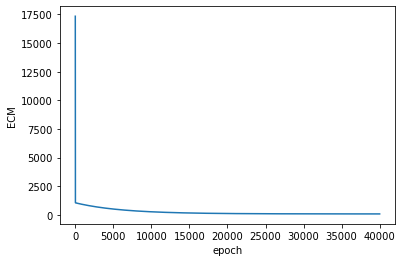

In [23]:
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

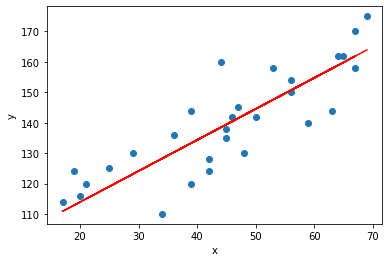

In [24]:
y_regr = calcular_modelo(w,b,x)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

El resultado de la Regresión Lineal (línea de color rojo) permite evidenciar que ésta se ajusta bastante bien a los datos originales (puntos azules), lo cual permite verificar que el algoritmo de Regresión Lineal en Python funciona adecuadamente.

Por último, veamos cómo calcular una predicción a partir del modelo ya entrenado.

Predicción
Para finalizar, podemos realizar una predicción teniendo el modelo ya entrenado.

Si, por ejemplo, queremos conocer el nivel de presión sanguínea que tendrá una persona de 90 años, simplemente ejecutamos las siguientes líneas de código:

In [28]:
edad = 21
presion = calcular_modelo(w,b,edad)
print("A los {}".format(edad), " años se tendrá una presión sanguínea de {:.1f}".format(presion))

A los 21  años se tendrá una presión sanguínea de 114.9
